Math 5750/6880: Mathematics of Data Science \\
Project 1

# 3. Python and Google Colab
Project Euler Problem  
https://projecteuler.net/

In [ ]:
# Problem 48, Self Powers
k = 0
series = []

for i in range(1,1001):
  i = i**i
  k += i
  series.append(k)

print(f"The last 10 digits of the series: {series[-10:]}")

The last 10 digits of the series: [12857393192975729955711735034029547480726550034912702646818236025957073936354497745155888740182286079863841767314624928770194838126530244885458400498943107121240912083943407377366411617532636358702495991139947693926617923070095394434290705516063573309456549035895134298313985031696843895903025942432839976366406967383189096183439711317917759123614171385799145960888054946118941194088663083602900221089260308329594939166815312225739558851357695996023103861307744275530046456474820810582930675967046842847724270423163466443424695398347982696739368235661621529250813962114181755103570804191343076297064271216300437306653817036286661198866753099311054158555841808914012909519847354633953038273547173466452662418619838496479229738503673432587580504323818127798618089305547771328261272430164979904704626451682839877170737522970894117450120841802120999133893859267122408973933928218674367479368329998668322674418075623506334751300324191608613417231350333339553865433392273

# 4. Regression Analysis
California housing data  
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

import seaborn as sns

In [4]:
# Load the California housing data
cal = fetch_california_housing(as_frame=True)
X, y = cal.data, cal.target
feature_names = X.columns
print(feature_names)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


In [11]:
print(X.shape)
print(y.shape)
print()
print(X.info())
print(X.describe())
print(X.head())
print()
print(y.describe())
print(y.head)
print()

(20640, 8)
(20640,)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400  

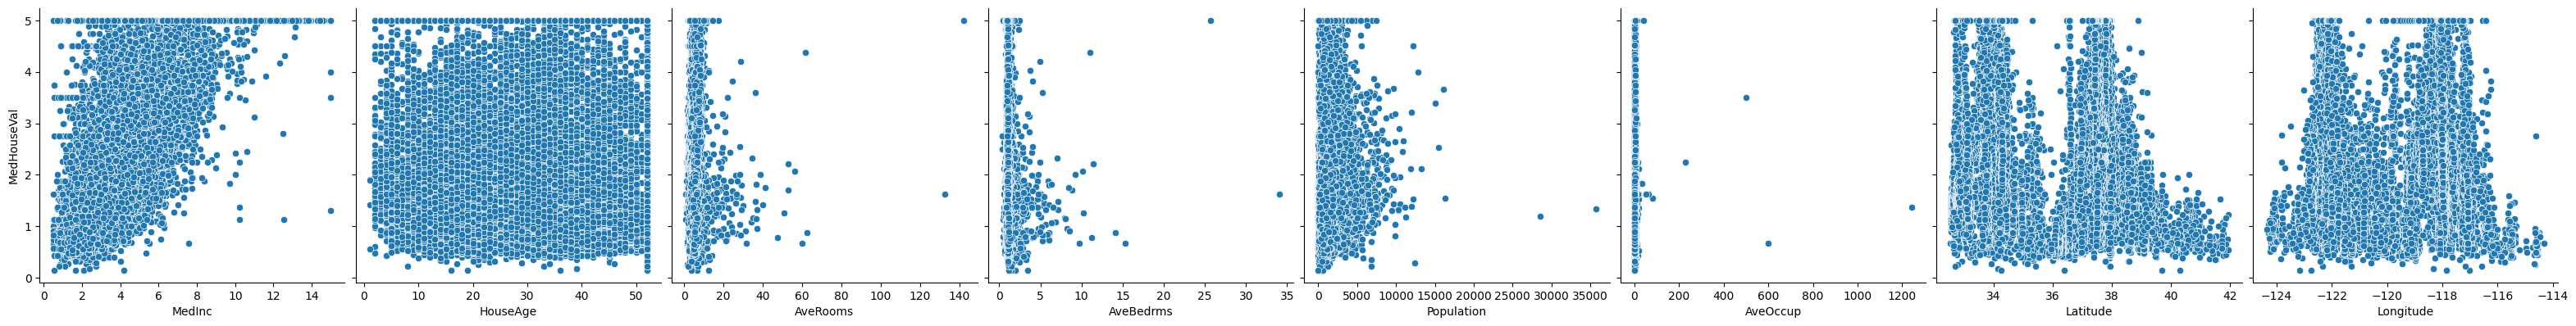

In [24]:
my_df = cal.frame
my_df['MedHouseVal'] = y
my_features = my_df.columns.drop('MedHouseVal').tolist()

sns.pairplot(my_df, x_vars=my_features, y_vars=['MedHouseVal'], height=4, aspect=1, kind='scatter')
plt.show()

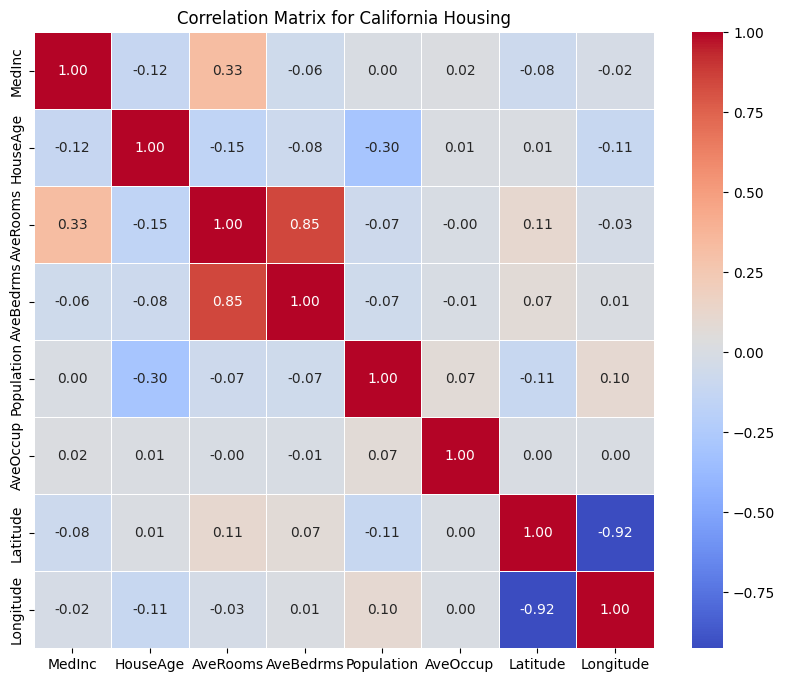

In [15]:
corr = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of California Housing Features')
plt.show()

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("Linear Regression RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Linear Regression MAE", mean_absolute_error(y_test, y_pred))
print("Linear Regression R-Squared", r2_score(y_test, y_pred))

Linear Regression RMSE 0.7273129773603114
Linear Regression MAE 0.535126133655451
Linear Regression R-Squared 0.5943232652466202


In [32]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Decision Tree RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Decision Tree MAE", mean_absolute_error(y_test, y_pred))
print("Decision Tree R-Squared", r2_score(y_test, y_pred))

Decision Tree RMSE 0.7231327877474223
Decision Tree MAE 0.46436136143410855
Decision Tree R-Squared 0.5989730720080344


In [33]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Random Forest RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Random Forest MAE", mean_absolute_error(y_test, y_pred))
print("Random Forest R-Squared", r2_score(y_test, y_pred))

Random Forest RMSE 0.511271644175482
Random Forest MAE 0.33495604219961256
Random Forest R-Squared 0.7995339457876446


In [34]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Gradient Boosting RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Gradient Boosting MAE", mean_absolute_error(y_test, y_pred))
print("Gradient Boosting R-Squared", r2_score(y_test, y_pred))

Gradient Boosting RMSE 0.5391942364358637
Gradient Boosting MAE 0.374241912908252
Gradient Boosting R-Squared 0.7770395095033192


In [35]:
from sklearn.linear_model import BayesianRidge

model = BayesianRidge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Bayesian Ridge RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Bayesian Ridge MAE", mean_absolute_error(y_test, y_pred))
print("Bayesian Ridge R-Squared", r2_score(y_test, y_pred))

Bayesian Ridge RMSE 0.7273781053671272
Bayesian Ridge MAE 0.5351853504668542
Bayesian Ridge R-Squared 0.5942506084924775


# 5. Classification Analysis
Diagnostic Wisconsin Breast Cancer Database  
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load Breast Cancer Wisconsin Dataset
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target                  # 0 = malignant, 1 = benign
feature_names = X.columns
label_names = {0: "malignant", 1: "benign"}
print(feature_names)

# Train/Test Split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Preprocess Data (fit on train ONLY; then transform both)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train)   # fit on train
X_test_std  = scaler.transform(X_test)        # transform test with train stats

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [ ]:
# your code here